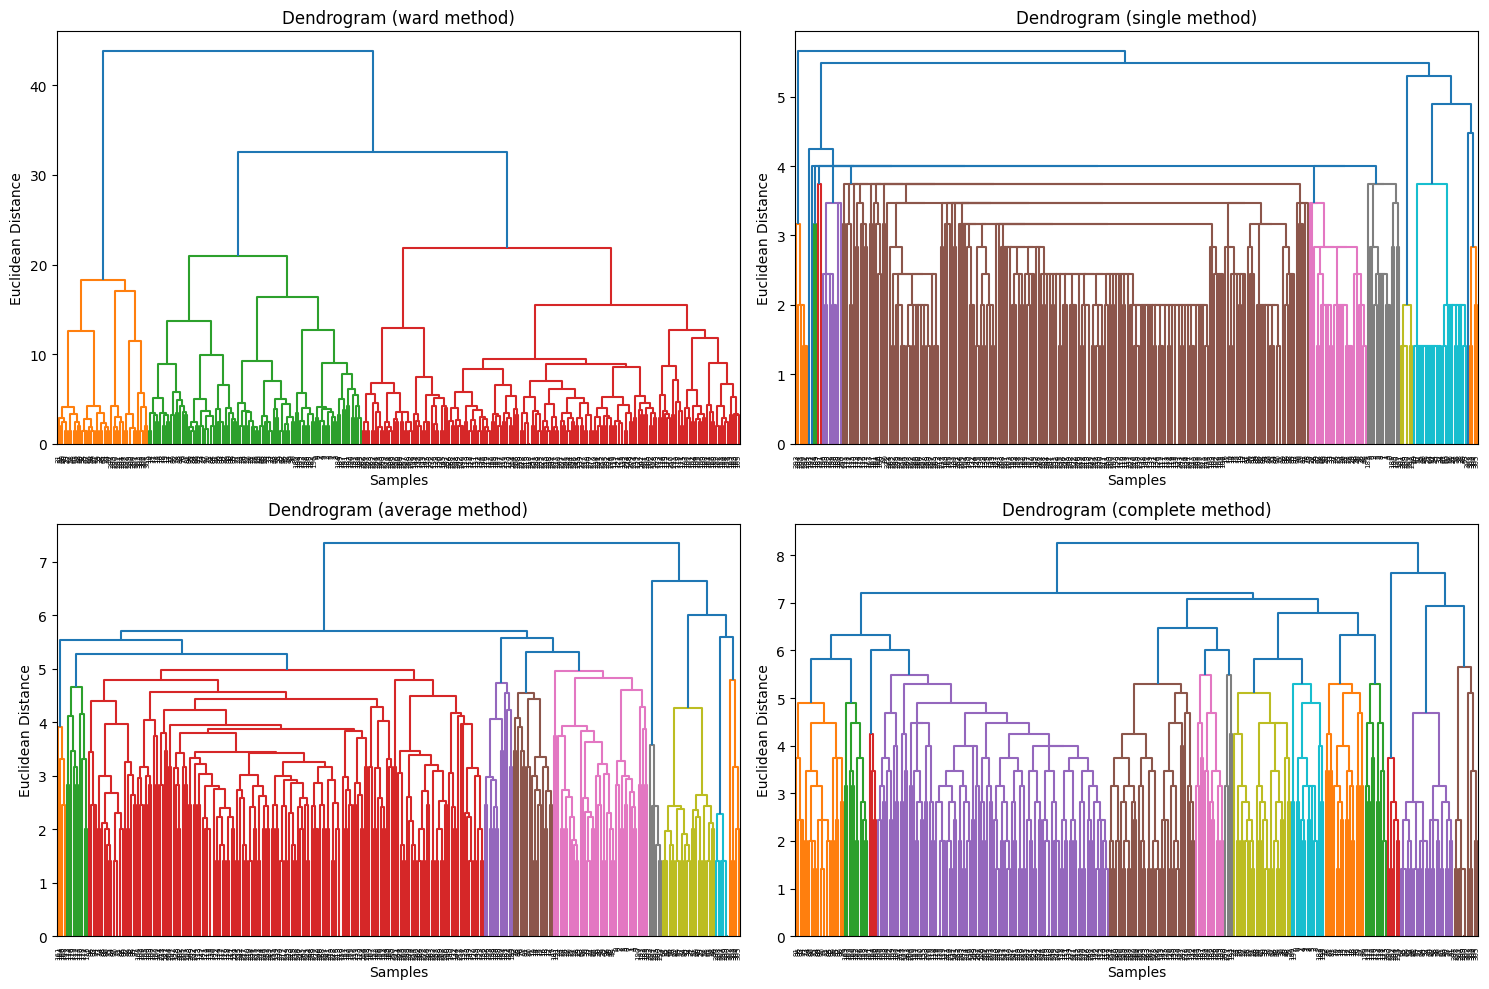

Adjusted Rand Index for ward method: 0.4647
Adjusted Rand Index for single method: 0.1426
Adjusted Rand Index for average method: 0.3287
Adjusted Rand Index for complete method: 0.4348


In [5]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, adjusted_rand_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from imblearn.over_sampling import SMOTE, SMOTEN, BorderlineSMOTE
from umap import UMAP
import pacmap
import trimap
import warnings

warnings.filterwarnings("ignore")

# Загружаем данные
post_operative_patient = fetch_ucirepo(id=90)  # Используем UCI ML репозиторий
X = post_operative_patient.data.features
y = post_operative_patient.data.targets

encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X)

methods = ['ward', 'single', 'average', 'complete']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Построение дендрограмм для каждого метода кластеризации
for ax, method in zip(axes.flatten(), methods):
    Z = linkage(X_encoded, method=method)
    ax.set_title(f'Dendrogram ({method} method)')
    dendrogram(Z, ax=ax)
    ax.set_xlabel('Samples')
    ax.set_ylabel('Euclidean Distance')

plt.tight_layout()
plt.show()

y = y.to_numpy().ravel()
for method in methods:
    clustering = AgglomerativeClustering(n_clusters=len(set(y)), linkage=method)
    labels = clustering.fit_predict(X_encoded)
    ari = adjusted_rand_score(y, labels)
    print(f"Adjusted Rand Index for {method} method: {ari:.4f}")

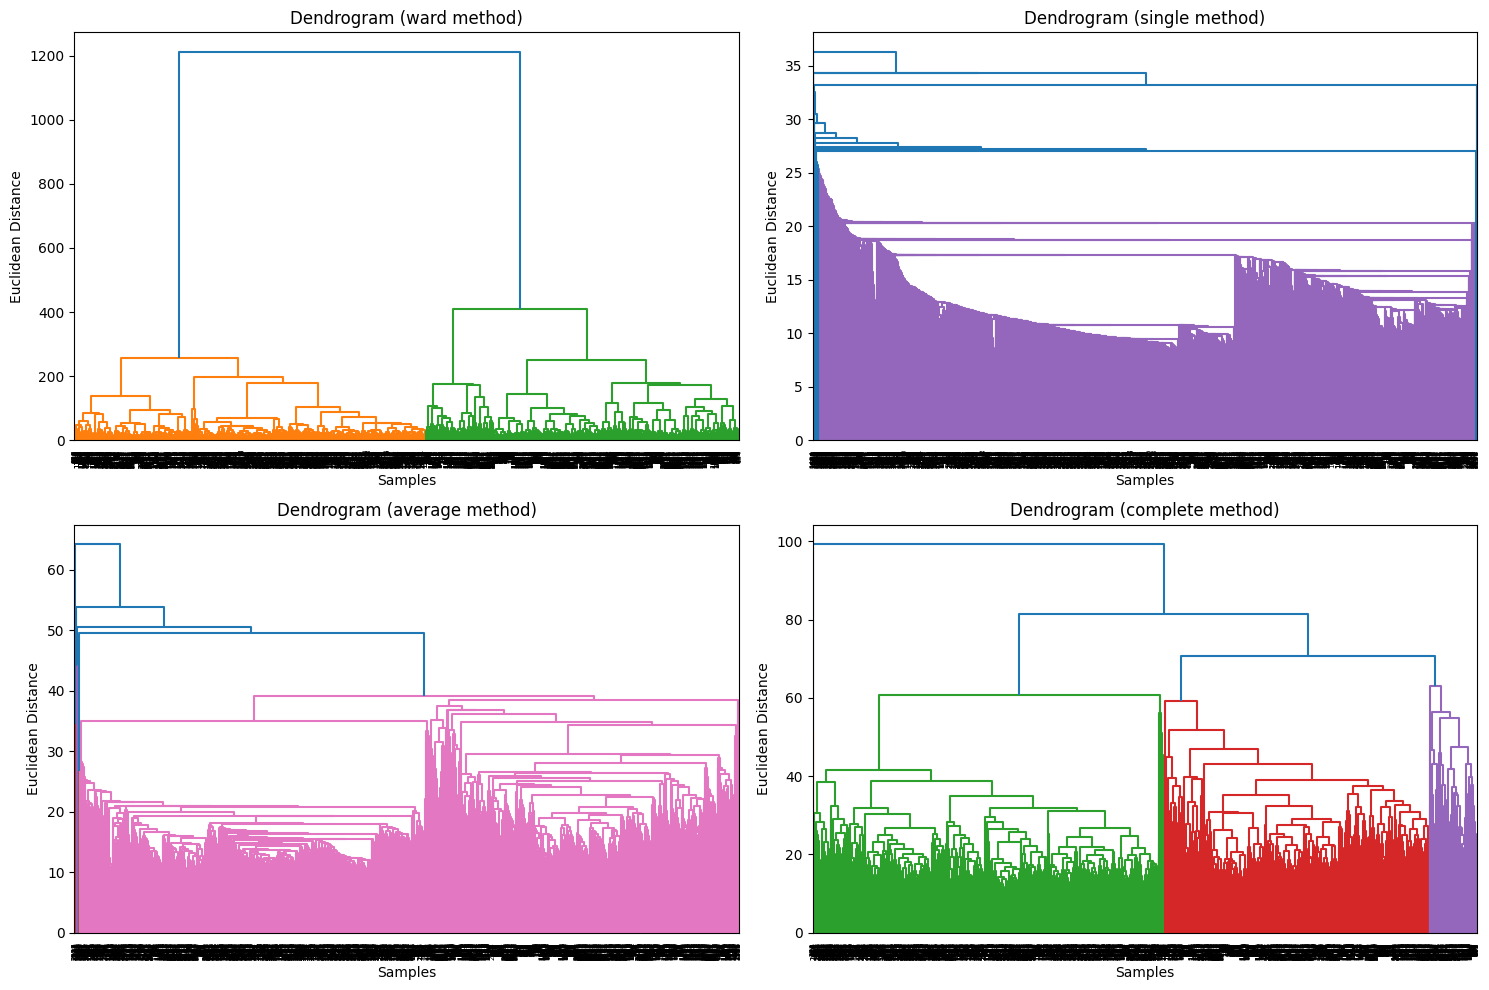


Method: ward


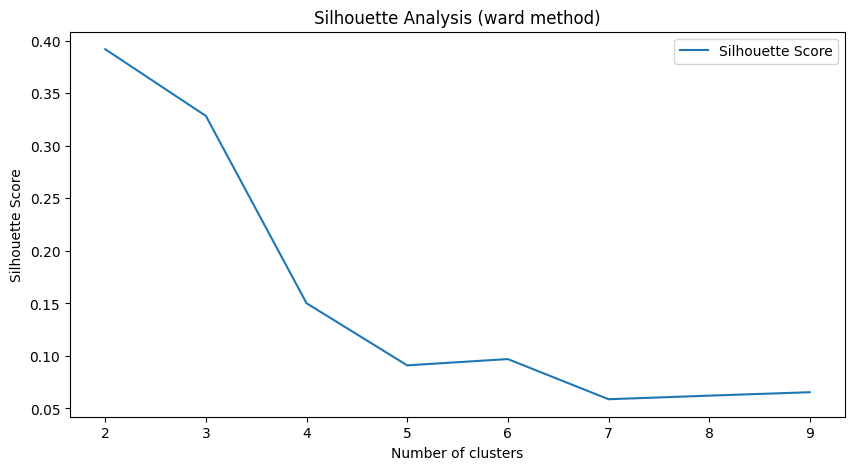

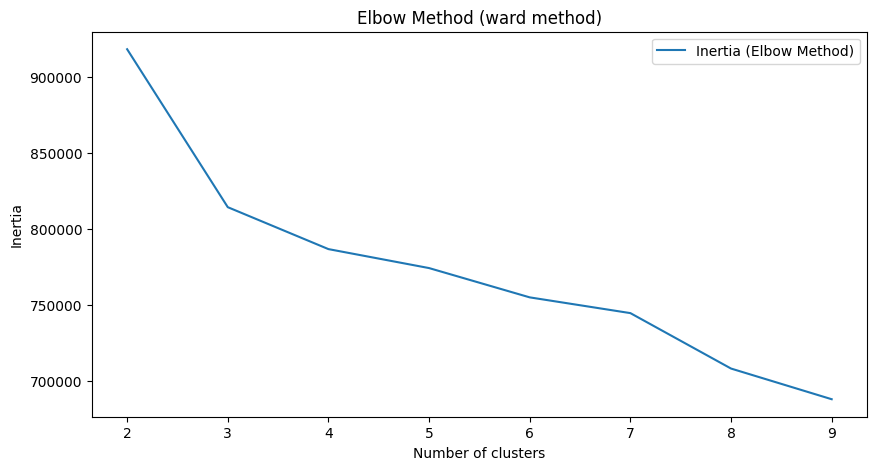


Method: single


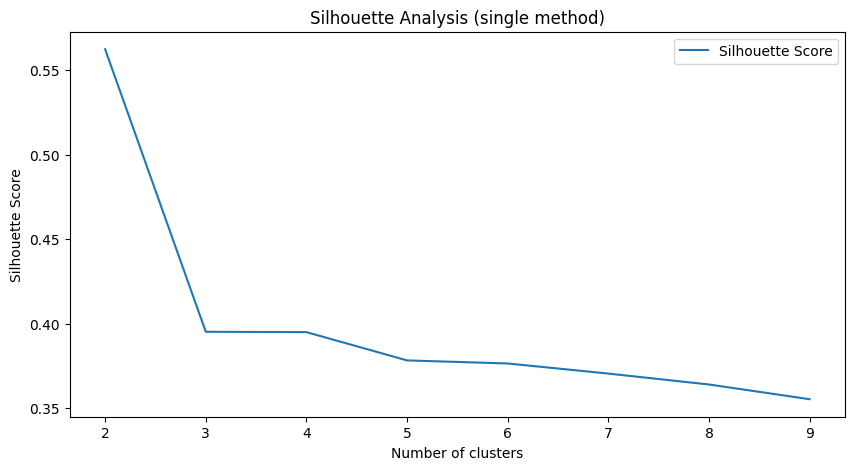

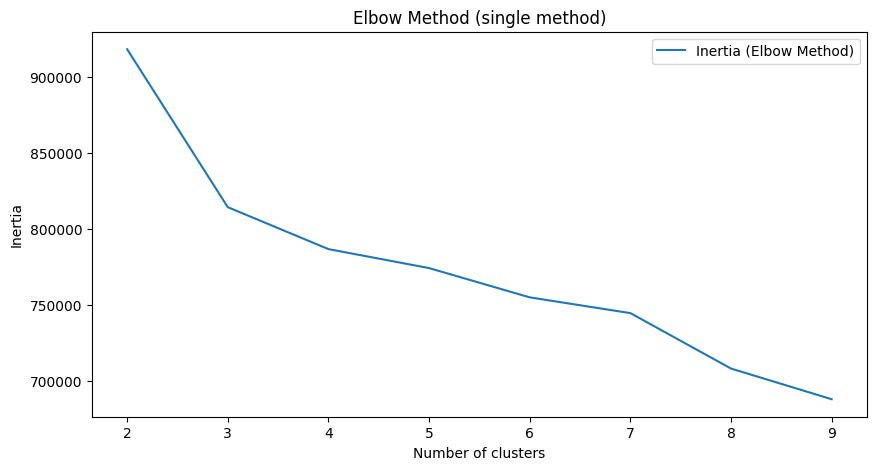


Method: average


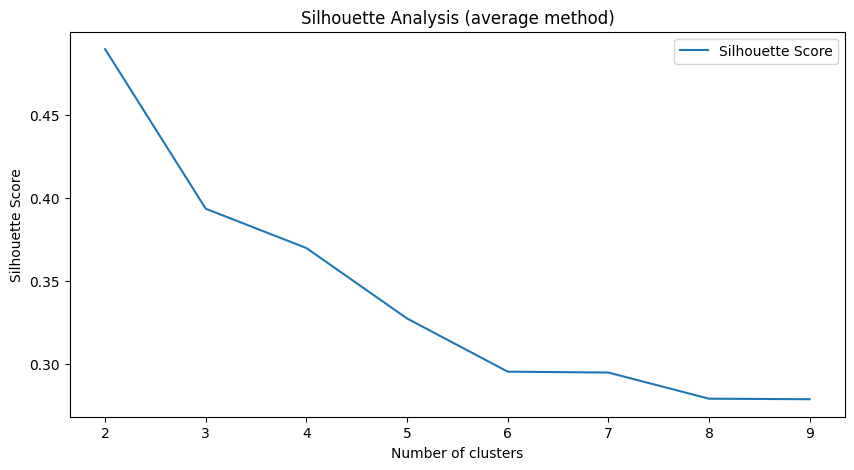

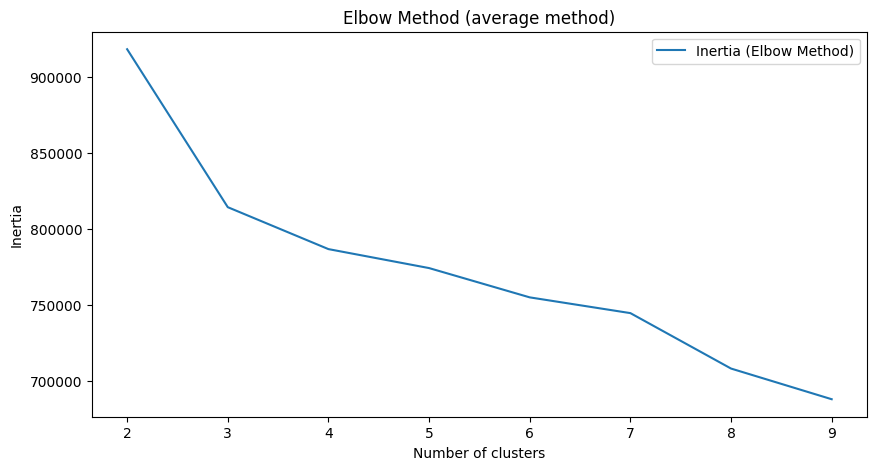


Method: complete


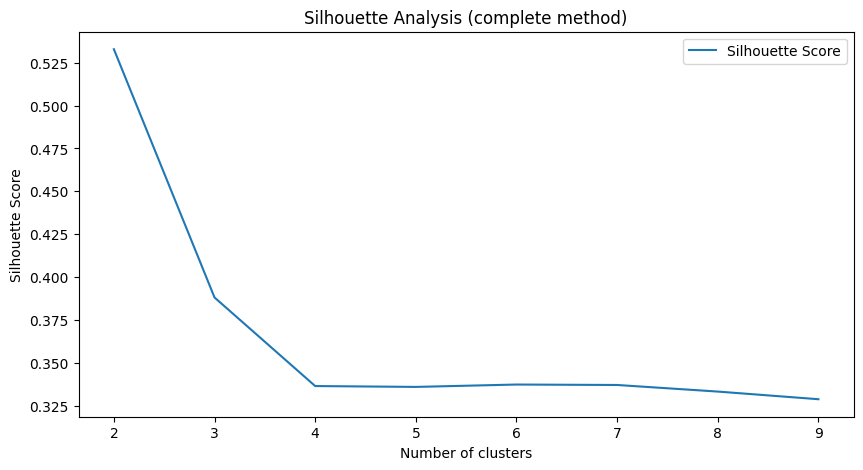

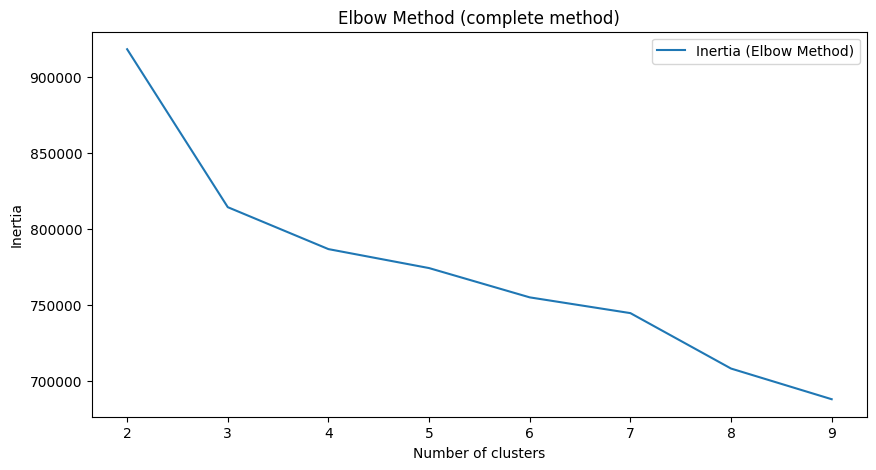

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans


# Чтение данных из текстового файла
data = np.loadtxt('UCI HAR Dataset/test/X_test.txt')

# Масштабирование данных для лучшей работы алгоритмов кластеризации
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Определение методов кластеризации
methods = ['ward', 'single', 'average', 'complete']

# Выполнение кластеризации и построение дендрограмм
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for ax, method in zip(axes.flatten(), methods):
    Z = linkage(data_scaled, method=method)
    ax.set_title(f'Dendrogram ({method} method)')
    dendrogram(Z, ax=ax)
    ax.set_xlabel('Samples')
    ax.set_ylabel('Euclidean Distance')

plt.tight_layout()
plt.show()

# Оценка качества кластеризации: метод локтя (Elbow Method) и коэффициент силуэта (Silhouette Index)
range_n_clusters = range(2, 10)
silhouette_scores = []
elbow_inertia = []

for method in methods:
    print(f"\nMethod: {method}")
    silhouette_vals = []
    inertia_vals = []

    for n_clusters in range_n_clusters:
        clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)
        cluster_labels = clustering.fit_predict(data_scaled)
        
        # Расчет коэффициента силуэта
        # 	•	Для каждой точки рассчитывается два значения:
	    #   •	a — среднее расстояние до всех других точек в том же кластере.
	    #   •	b — среднее расстояние до ближайшего кластера, к которому эта точка не принадлежит.
	    #   •	Коэффициент силуэта (S) для точки определяется как:

        #   S = b - a/max(a, b)

        silhouette_avg = silhouette_score(data_scaled, cluster_labels)
        silhouette_vals.append(silhouette_avg)

    silhouette_scores.append(silhouette_vals)

    # Метод локтя - используем сумму квадратов расстояний от каждой точки до центра каждого кластера (используем k-means для расчета инерции)
    for n_clusters in range_n_clusters:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(data_scaled)
        inertia_vals.append(kmeans.inertia_)

    elbow_inertia.append(inertia_vals)

    # Построение графиков
    plt.figure(figsize=(10, 5))
    plt.plot(range_n_clusters, silhouette_vals, label="Silhouette Score")
    plt.title(f'Silhouette Analysis ({method} method)')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(range_n_clusters, inertia_vals, label="Inertia (Elbow Method)")
    plt.title(f'Elbow Method ({method} method)')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.legend()
    plt.show()

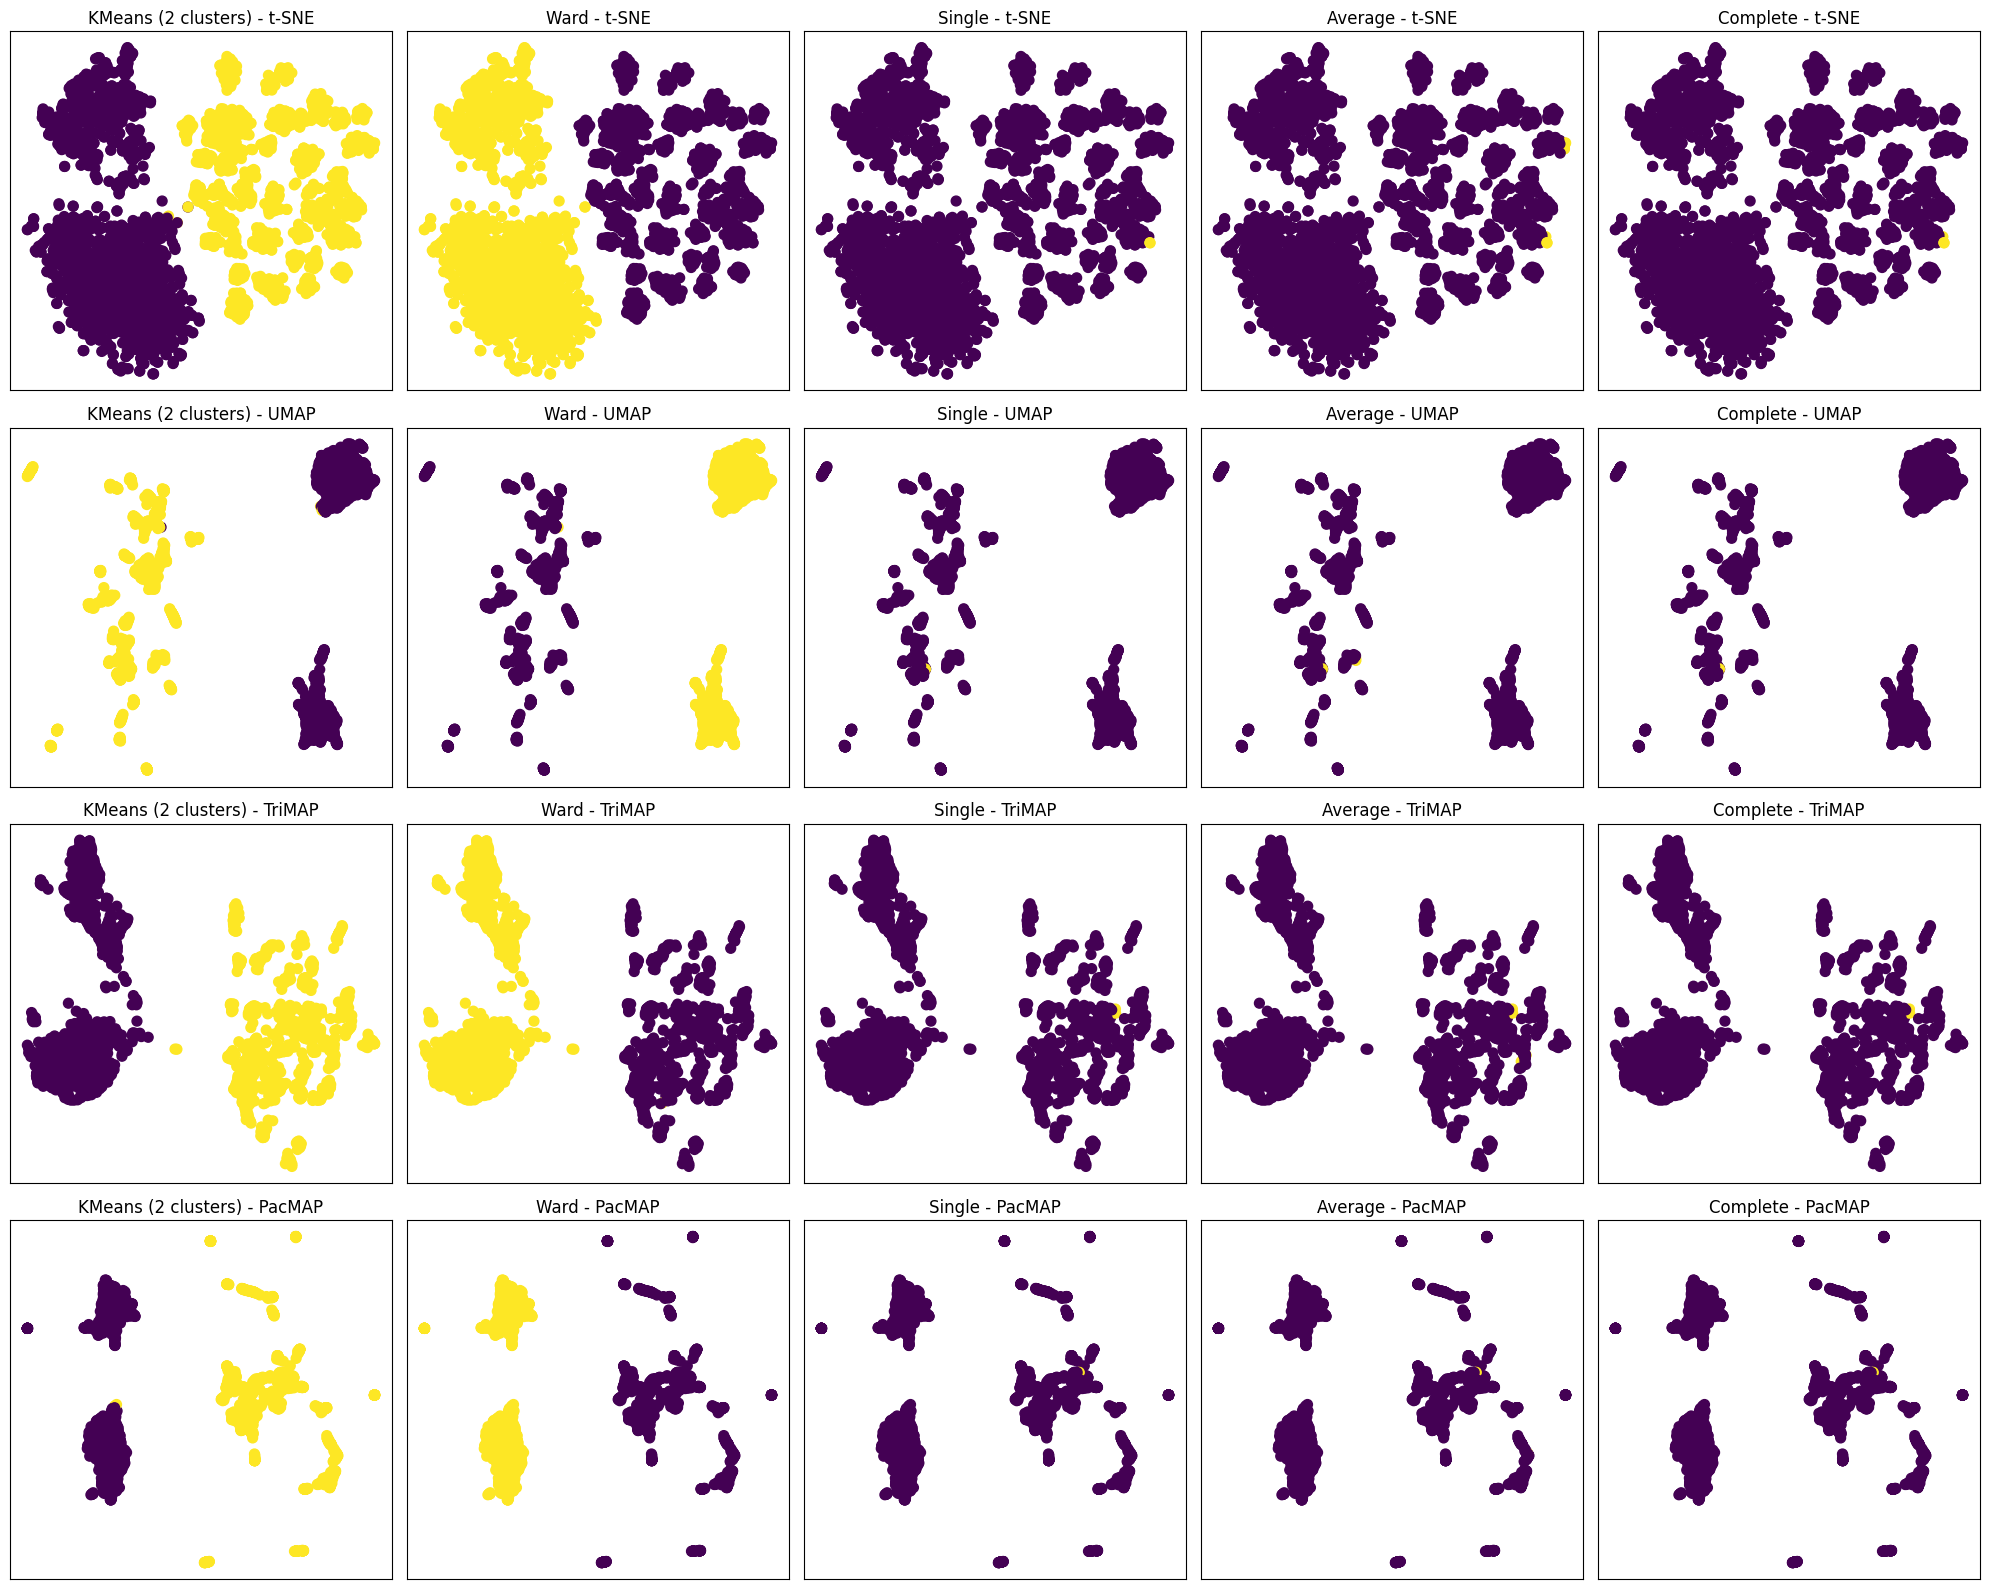

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.manifold import TSNE
import umap
import trimap
import pacmap
from scipy.cluster.hierarchy import linkage

# Чтение данных из текстового файла
data = np.loadtxt('UCI HAR Dataset/test/X_test.txt')

# Масштабирование данных
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Выполнение кластеризации
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

methods = ['ward', 'single', 'average', 'complete']
cluster_labels = {}

for method in methods:
    agg_clustering = AgglomerativeClustering(n_clusters=2, linkage=method)
    cluster_labels[method] = agg_clustering.fit_predict(data_scaled)

# Нелинейное снижение размерности
reducers = {
    't-SNE': TSNE(n_components=2, random_state=42),
    'UMAP': umap.UMAP(n_components=2, random_state=42),
    'TriMAP': trimap.TRIMAP(),
    'PacMAP': pacmap.PaCMAP(n_components=2, random_state=42)
}

# Визуализация
fig, axes = plt.subplots(4, 5, figsize=(20, 16))

for i, (name, reducer) in enumerate(reducers.items()):
    # Применение каждого алгоритма для снижения размерности
    data_reduced = reducer.fit_transform(data_scaled)
    
    # Визуализация KMeans
    axes[i, 0].scatter(data_reduced[:, 0], data_reduced[:, 1], c=kmeans_labels, cmap='viridis', s=50)
    axes[i, 0].set_title(f'KMeans (2 clusters) - {name}')
    
    # Визуализация агломеративных методов
    for j, method in enumerate(methods):
        axes[i, j + 1].scatter(data_reduced[:, 0], data_reduced[:, 1], c=cluster_labels[method], cmap='viridis', s=50)
        axes[i, j + 1].set_title(f'{method.capitalize()} - {name}')

# Добавляем разметку
for ax in axes.flat:
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

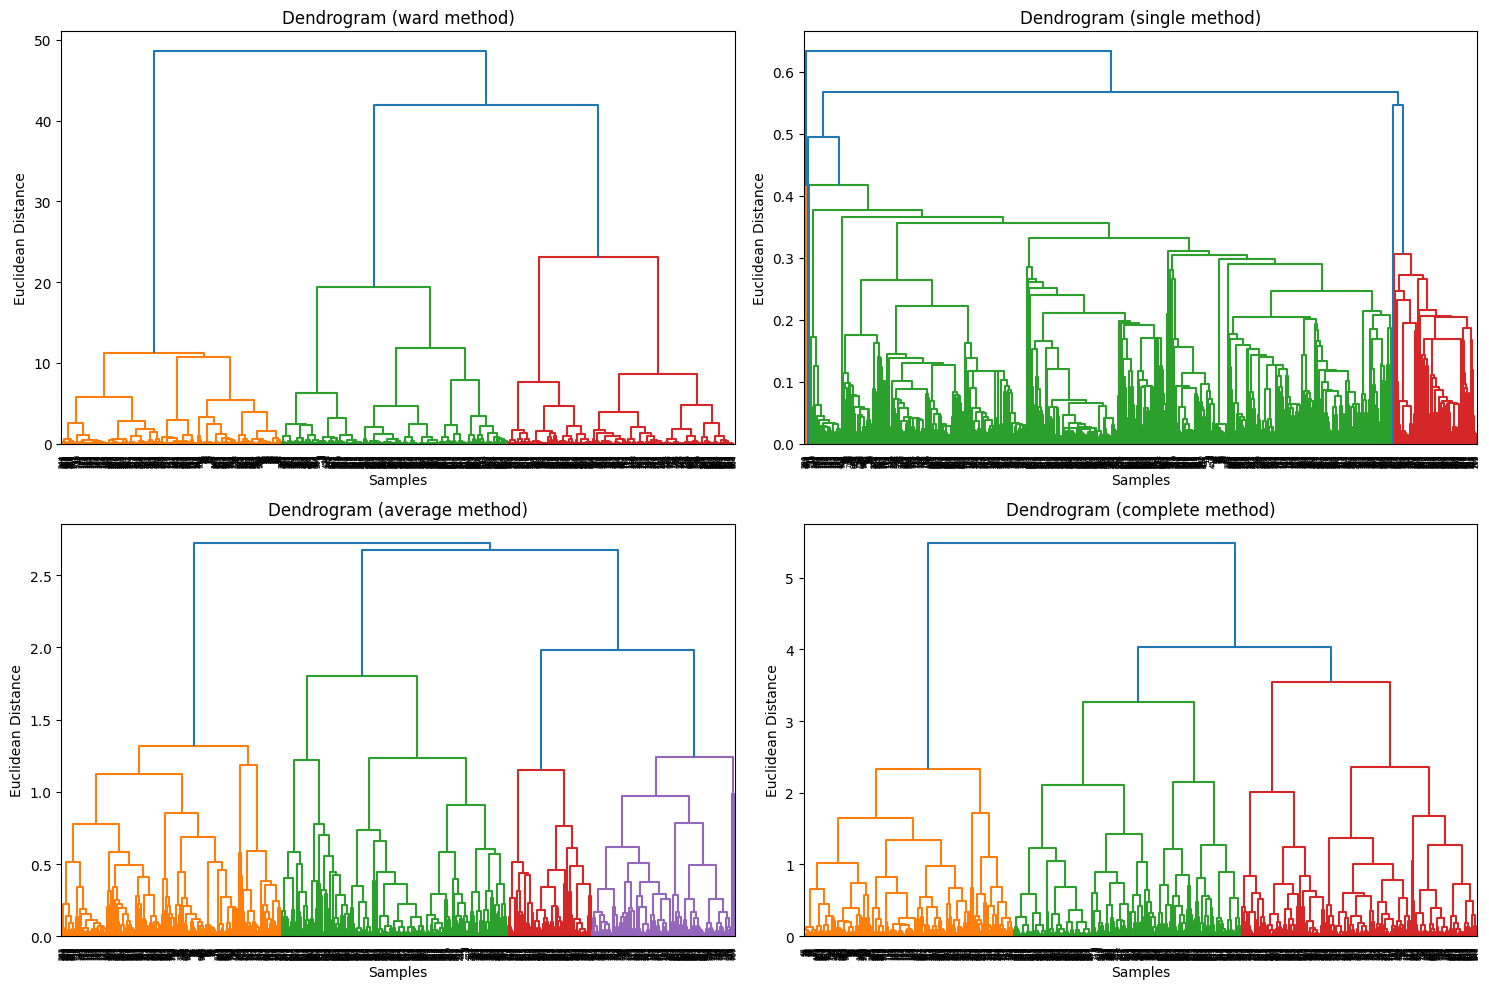


Method: ward


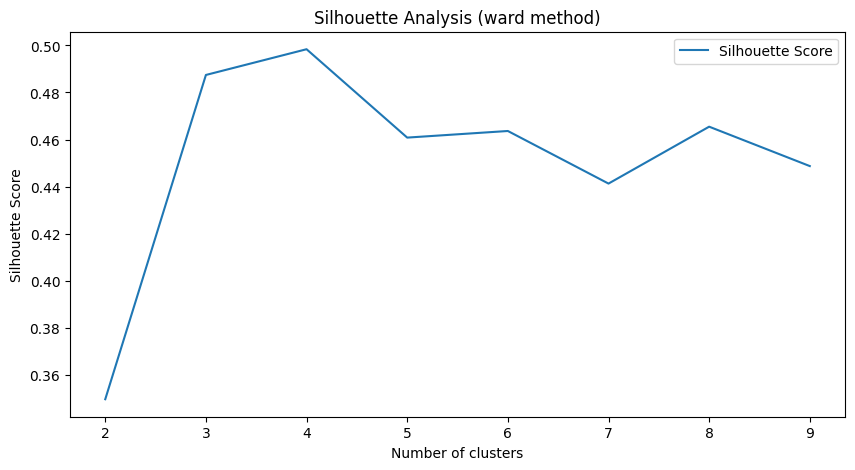

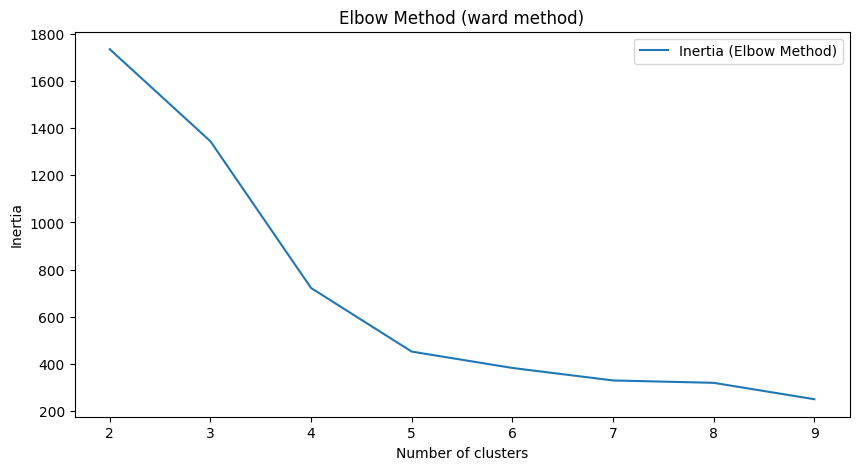


Method: single


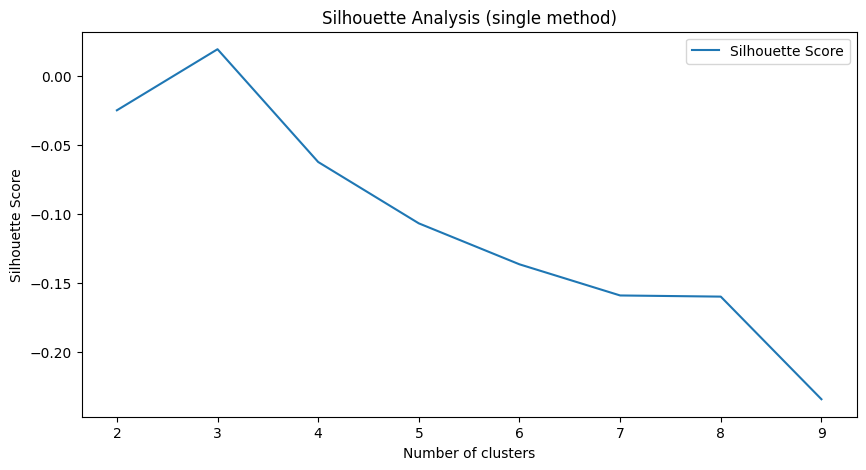

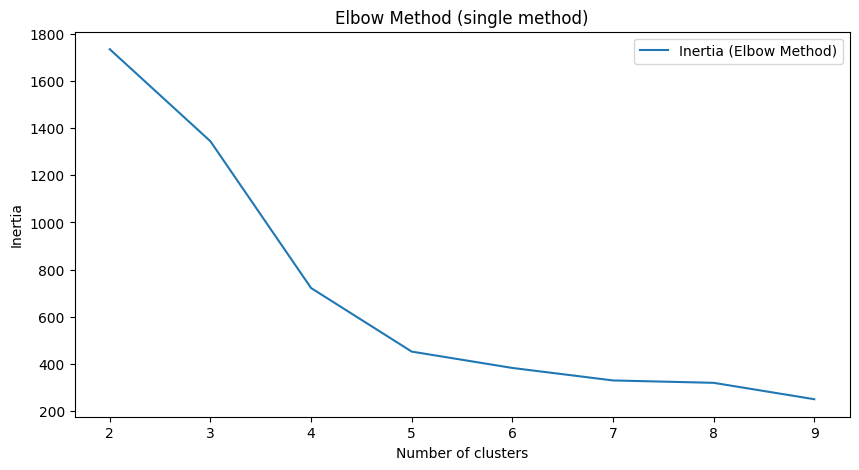


Method: average


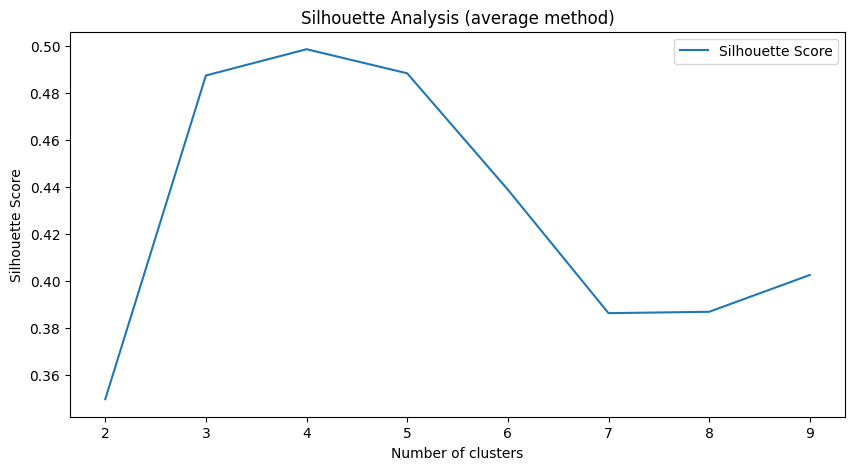

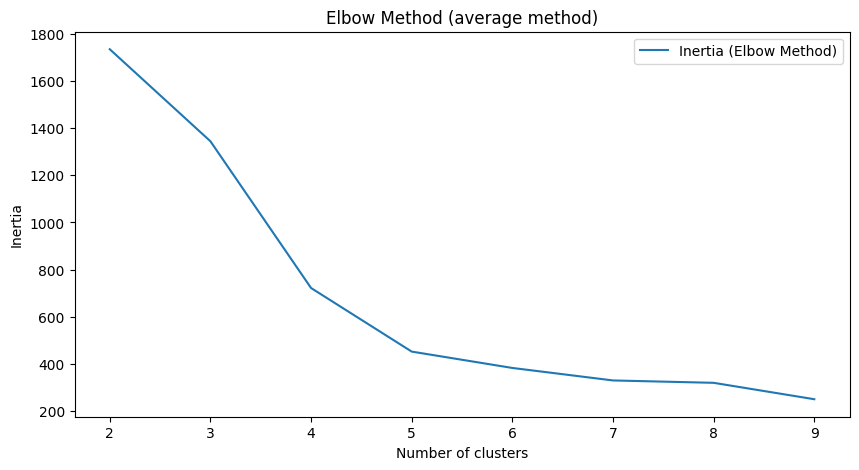


Method: complete


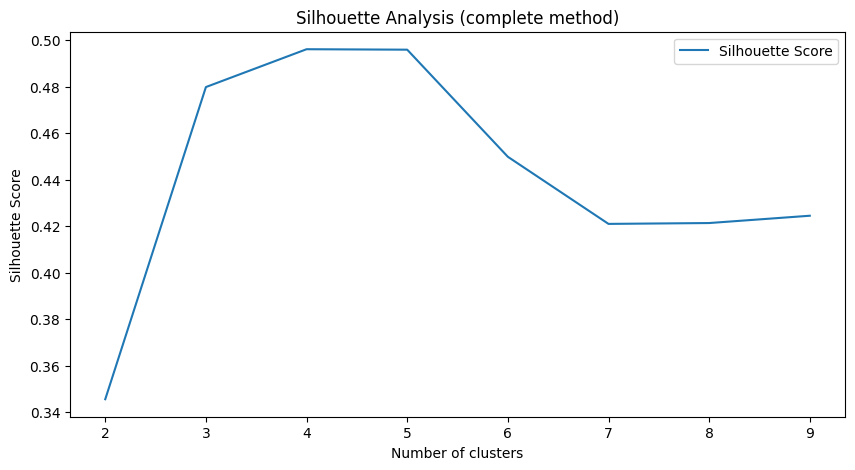

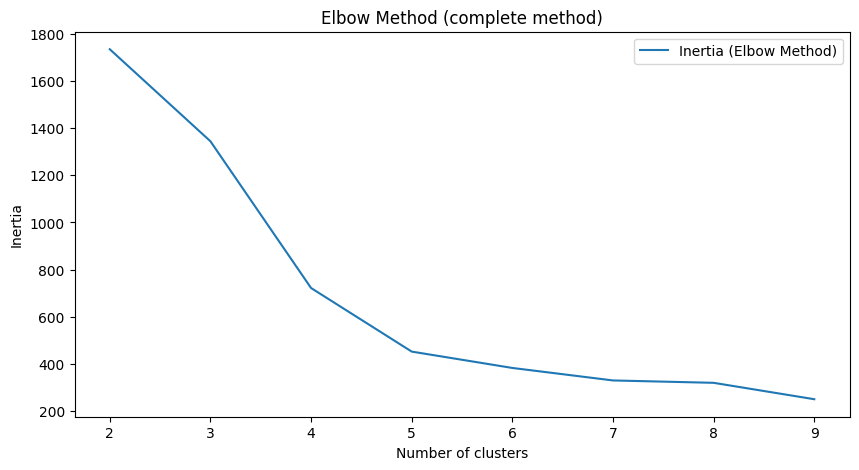

In [3]:
from sklearn.utils import gen_batches
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans


data = pd.read_csv('mammoth.csv')  # Укажите путь к вашему CSV файлу

X = data[['x', 'y', 'z']]
# Преобразование категориальных признаков в числовые с помощью One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.head(10000))

# Определение методов кластеризации
methods = ['ward', 'single', 'average', 'complete']

# Выполнение кластеризации и построение дендрограмм
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for ax, method in zip(axes.flatten(), methods):
    Z = linkage(data_scaled, method=method)
    ax.set_title(f'Dendrogram ({method} method)')
    dendrogram(Z, ax=ax)
    ax.set_xlabel('Samples')
    ax.set_ylabel('Euclidean Distance')

plt.tight_layout()
plt.show()

# Оценка качества кластеризации: метод локтя (Elbow Method) и коэффициент силуэта (Silhouette Index)
range_n_clusters = range(2, 10)
silhouette_scores = []
elbow_inertia = []

for method in methods:
    print(f"\nMethod: {method}")
    silhouette_vals = []
    inertia_vals = []

    for n_clusters in range_n_clusters:
        clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)
        cluster_labels = clustering.fit_predict(data_scaled)
        
        # Расчет коэффициента силуэта
        silhouette_avg = silhouette_score(data_scaled, cluster_labels)
        silhouette_vals.append(silhouette_avg)

    silhouette_scores.append(silhouette_vals)

    # Метод локтя - используем сумму квадратов расстояний для каждого кластера (используем k-means для расчета инерции)
    for n_clusters in range_n_clusters:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(data_scaled)
        inertia_vals.append(kmeans.inertia_)

    elbow_inertia.append(inertia_vals)

    # Построение графиков
    plt.figure(figsize=(10, 5))
    plt.plot(range_n_clusters, silhouette_vals, label="Silhouette Score")
    plt.title(f'Silhouette Analysis ({method} method)')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(range_n_clusters, inertia_vals, label="Inertia (Elbow Method)")
    plt.title(f'Elbow Method ({method} method)')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.legend()
    plt.show()

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             306 non-null    float64
 1   plant-stand      299 non-null    float64
 2   precip           296 non-null    float64
 3   temp             300 non-null    float64
 4   hail             266 non-null    float64
 5   crop-hist        306 non-null    float64
 6   area-damaged     306 non-null    float64
 7   severity         266 non-null    float64
 8   seed-tmt         266 non-null    float64
 9   germination      271 non-null    float64
 10  plant-growth     306 non-null    float64
 11  leaves           307 non-null    int64  
 12  leafspots-halo   282 non-null    float64
 13  leafspots-marg   282 non-null    float64
 14  leafspot-size    282 non-null    float64
 15  leaf-shread      281 non-null    float64
 16  leaf-malf        282 non-null    float64


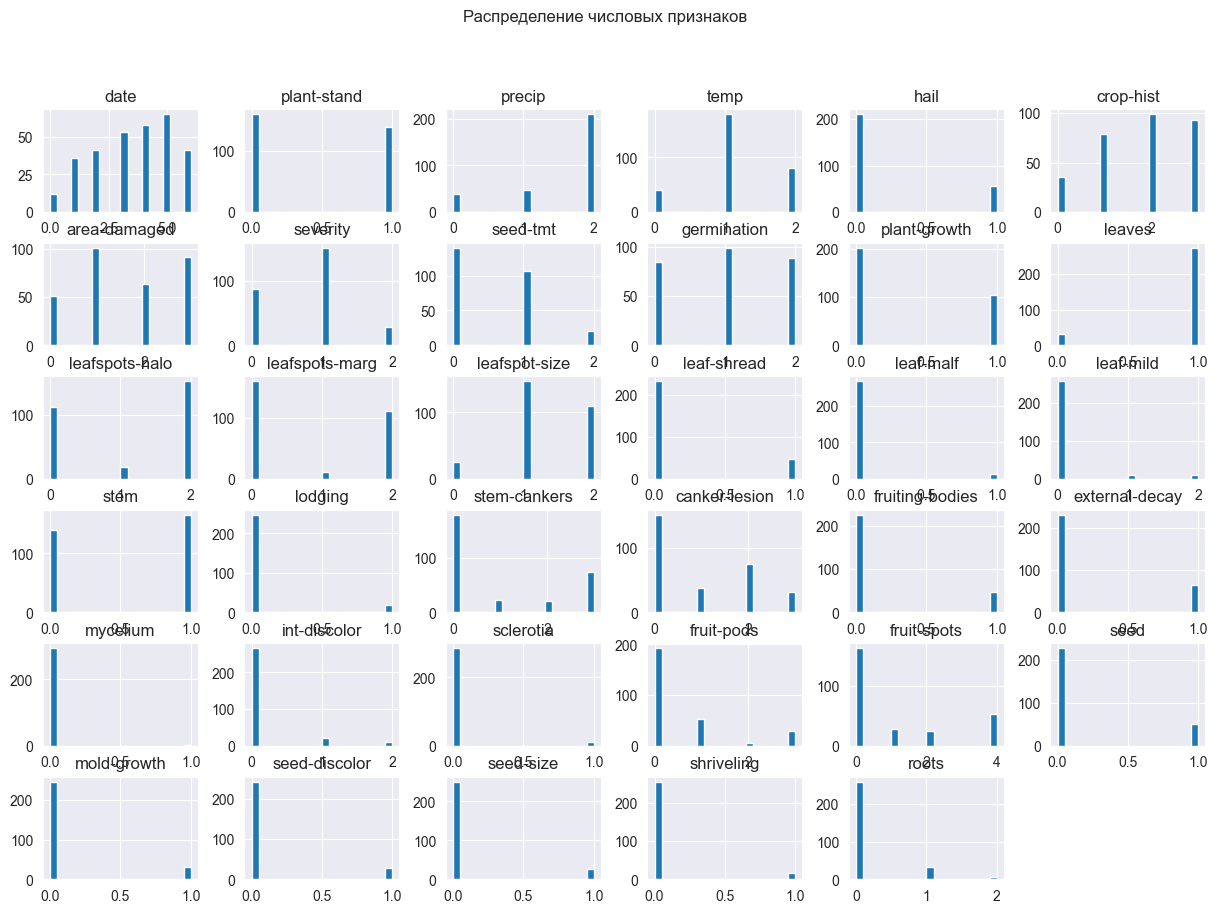

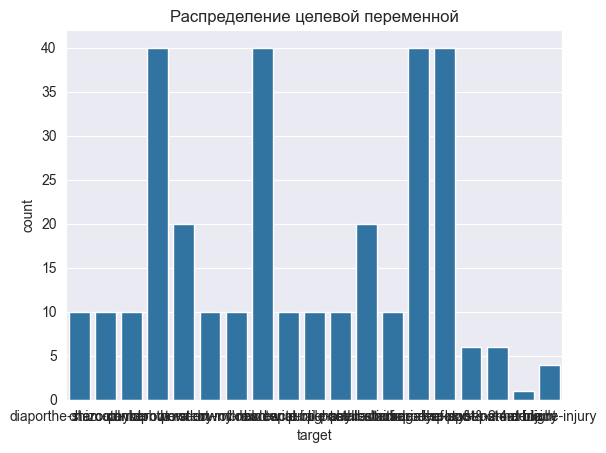

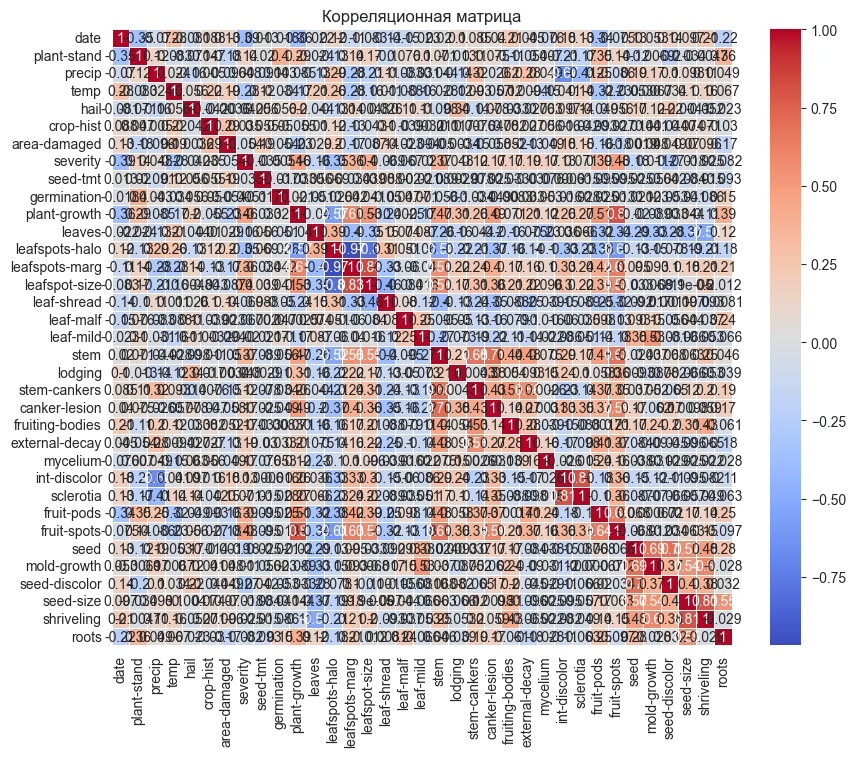

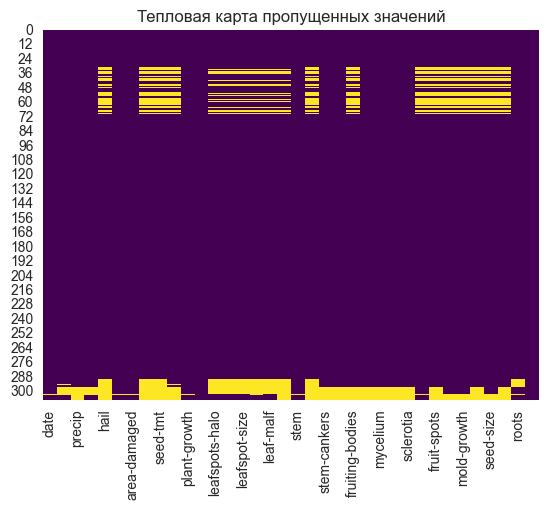

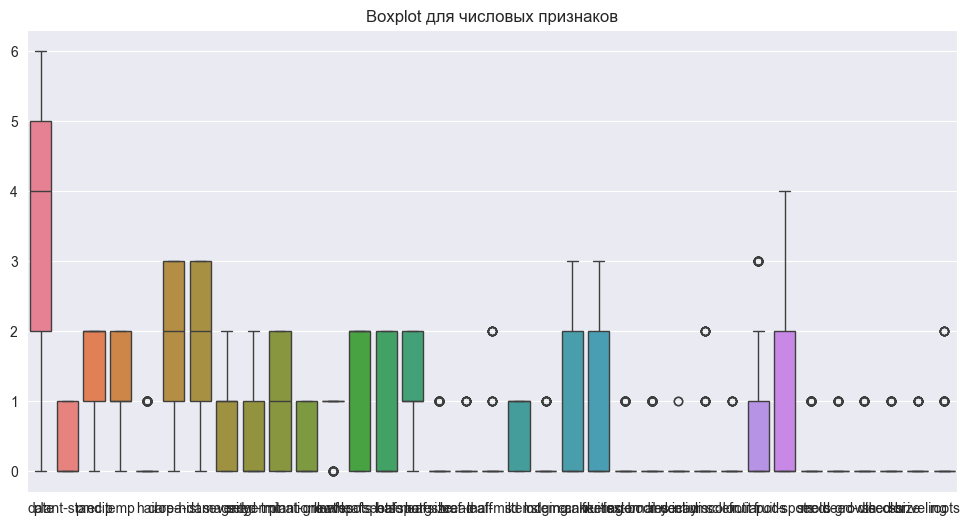

In [5]:
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

warnings.filterwarnings("ignore")

# Загружаем данные
post_operative_patient = fetch_ucirepo(id=90)  # Используем UCI ML репозиторий
X = post_operative_patient.data.features
y = post_operative_patient.data.targets

encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X)

# Объединение признаков и целевой переменной в один DataFrame для удобства анализа
df = X.copy()
df['target'] = y

# 2. Описание данных
print("Информация о данных:")
print(df.info())  # Проверяем типы данных и наличие пропущенных значений
print("\nОсновная статистика данных:")
print(df.describe())  # Описательная статистика для числовых данных
print("\nКоличество пропущенных значений:")
print(df.isnull().sum())  # Проверка на пропуски

# 3. Визуализация данных

# Гистограмма для всех числовых признаков
df.hist(figsize=(15, 10), bins=20)
plt.suptitle('Распределение числовых признаков')
plt.show()

# Распределение целевой переменной (target)
sns.countplot(x='target', data=df)
plt.title('Распределение целевой переменной')
plt.show()

# 4. Корреляция и зависимость

numeric_df = df.select_dtypes(include='number')

# Построение корреляционной матрицы только для числовых столбцов
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица')
plt.show()

# Парные графики для всех числовых признаков
sns.pairplot(df, hue='target', diag_kind='kde')
plt.suptitle('Парные графики для признаков и целевой переменной')
plt.show()

# Анализ пропущенных значений через heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Тепловая карта пропущенных значений')
plt.show()

# 5. Boxplot для анализа выбросов
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.title('Boxplot для числовых признаков')
plt.show()

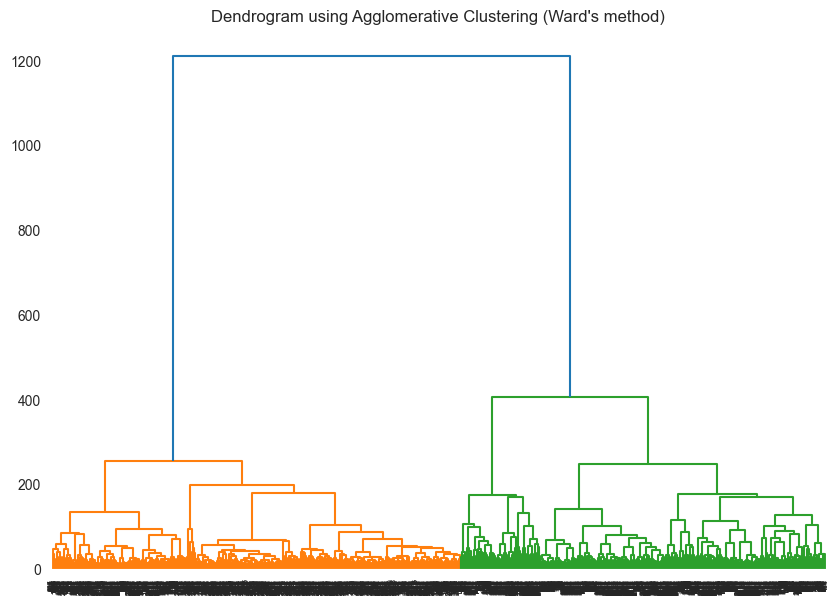

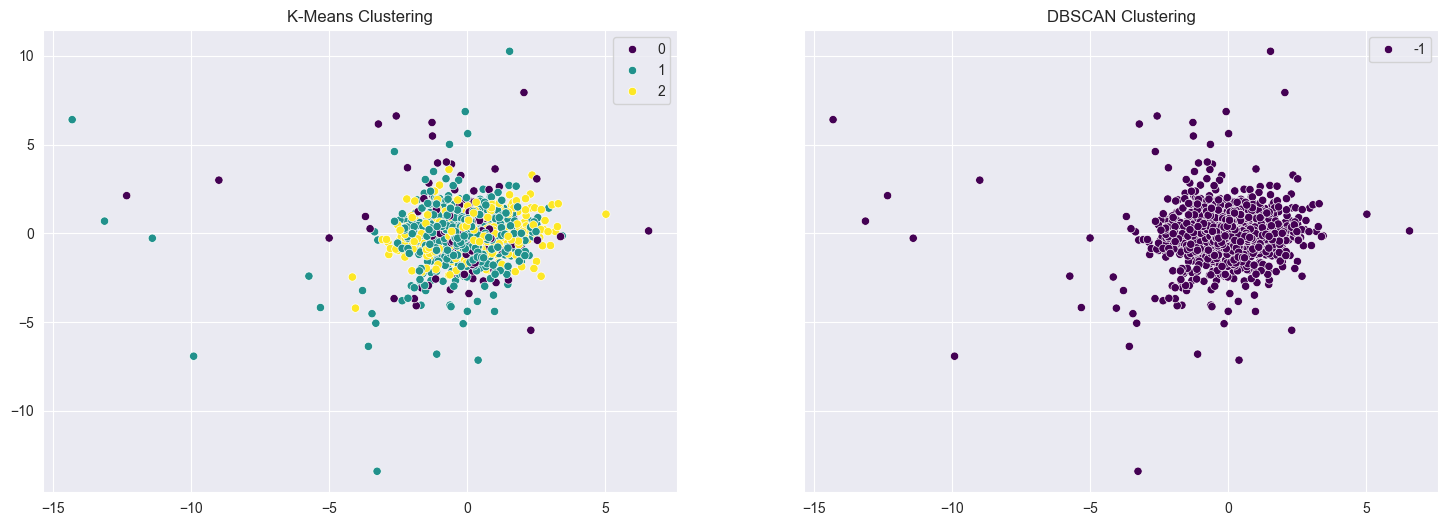

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

# Чтение данных из текстового файла
data = np.loadtxt('UCI HAR Dataset/test/X_test.txt')

# Масштабирование данных
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# ---- K-Means ----
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

# ---- DBSCAN ----
dbscan = DBSCAN(eps=0.9, min_samples=3)
dbscan_labels = dbscan.fit_predict(data_scaled)



# ---- Agglomerative Clustering (для дендрограммы) ----
linked = linkage(data_scaled, method='ward')

# ---- Визуализация дендрограмм ----
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title("Dendrogram using Agglomerative Clustering (Ward's method)")
plt.show()

# ---- Визуализация кластеров ----
fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharex=True, sharey=True)
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=kmeans_labels, ax=axes[0], palette="viridis")
axes[0].set_title("K-Means Clustering")

sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=dbscan_labels, ax=axes[1], palette="viridis")
axes[1].set_title("DBSCAN Clustering")


plt.show()
